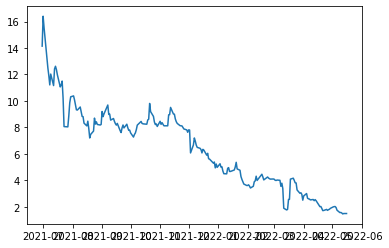

In [1]:
import matplotlib.pyplot as plt# plotting library
import yfinance as yf
sp500 = yf.Ticker("^GSPC").history(period='max')
msft = yf.Ticker("MSFT").history(period='max')
didi = yf.Ticker("DIDI").history(period='max')
didi_close = didi['Close']
plt.plot(didi_close)


In [63]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [3]:
stock_data = didi

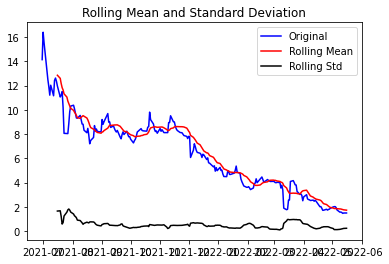

Results of dickey fuller test
Test Statistics                 -0.647057
p-value                          0.859991
No. of lags used                15.000000
Number of observations used    206.000000
critical value (1%)             -3.462499
critical value (5%)             -2.875675
critical value (10%)            -2.574304
dtype: float64


In [4]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(didi_close)


In [61]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(didi_close, test_size=0.15, shuffle=False)

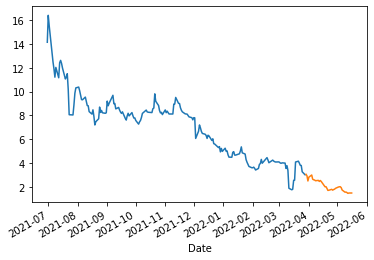

In [62]:
train_data.plot()
test_data.plot()

In [64]:
model_aa = pm.ARIMA(order=(3, 1, 2))
model_aa.fit(train_data)

ARIMA(order=(3, 1, 2))

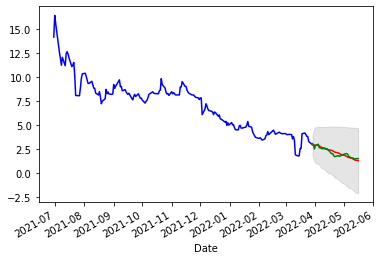

In [65]:
fc_aa, conf_int_aa = model_aa.predict(n_periods=len(test_data), return_conf_int=True)
low_aa = pd.Series(conf_int_aa[:, 0], index=test_data.index)
hight_aa = pd.Series(conf_int_aa[:, 1], index=test_data.index)
pd.Series(fc_aa, index=test_data.index).plot(color='r')
plt.fill_between(low_aa.index, low_aa, hight_aa, color='k', alpha=.10)
train_data.plot(color='b')
test_data.plot(color='g')